# Data Analysis with Pandas

### Authors

###### Noemi Benci
Bachelor's Degree in Statistics.

###### Federico Pirona 
Bachelor's Degree in Statistics.

## Introduction
This analysis focuses on the spread of SARS-CoV-2 in Italy. 
Data are dowloded from these repositories on GitHub
- https://github.com/pcm-dpc/COVID-19/blob/master/dati-json/dpc-covid19-ita-regioni.json (Data for regions)
- https://github.com/pcm-dpc/COVID-19/blob/master/dati-json/dpc-covid19-ita-province.json (Data for province)

The data are updated every day from February, 24 2020 to June, 17, 2020 by the Depatment of the Civil Protecition. 
Data regards some day-by-day counts about the amount of infected, of deaths, of recovered and other conditions.
It has a natural tree structure because for each region there are one or more provinces and each pair is recorded daily. 

The analysis starts visualizing variables and the structures of the two datasets. 
Then we show some useful graphical representation of the data. After that we provide some data manipulation to get data more handle. 
Finally we combine together the two datasets and use a hierarchical indexing to make the dataset more readable.

## Loading data

In [96]:
import json                                           # to open file json
import pandas as pd                                   # to manage data
import numpy as np                                    # to create array
import matplotlib.pyplot as plt                       # to make plots
from datetime import date, datetime                   # to convert strings in dates
import seaborn as sns                                 # library for nicer plots
import zipfile
import requests
import io
import os
import geopandas as gpd                               # to add Italy map
import geoplot                                        # to add Italy map
sns.set()
%matplotlib inline

In [82]:
with open('./dati/dati-json/dpc-covid19-ita-province.json') as f:
    d1 = json.load(f)

In [83]:
with open('./dati/dati-json/dpc-covid19-ita-regioni.json') as f:
    d2 = json.load(f)

### Visualize data as dictionary

In [84]:
d1[:2]

[{'data': '2020-02-24T18:00:00',
  'stato': 'ITA',
  'codice_regione': 13,
  'denominazione_regione': 'Abruzzo',
  'codice_provincia': 69,
  'denominazione_provincia': 'Chieti',
  'sigla_provincia': 'CH',
  'lat': 42.35103167,
  'long': 14.16754574,
  'totale_casi': 0,
  'note_it': '',
  'note_en': ''},
 {'data': '2020-02-24T18:00:00',
  'stato': 'ITA',
  'codice_regione': 13,
  'denominazione_regione': 'Abruzzo',
  'codice_provincia': 66,
  'denominazione_provincia': "L'Aquila",
  'sigla_provincia': 'AQ',
  'lat': 42.35122196,
  'long': 13.39843823,
  'totale_casi': 0,
  'note_it': '',
  'note_en': ''}]

In [85]:
d2[:2]

[{'data': '2020-02-24T18:00:00',
  'stato': 'ITA',
  'codice_regione': 13,
  'denominazione_regione': 'Abruzzo',
  'lat': 42.35122196,
  'long': 13.39843823,
  'ricoverati_con_sintomi': 0,
  'terapia_intensiva': 0,
  'totale_ospedalizzati': 0,
  'isolamento_domiciliare': 0,
  'totale_positivi': 0,
  'variazione_totale_positivi': 0,
  'nuovi_positivi': 0,
  'dimessi_guariti': 0,
  'deceduti': 0,
  'totale_casi': 0,
  'tamponi': 5,
  'casi_testati': None,
  'note_it': '',
  'note_en': ''},
 {'data': '2020-02-24T18:00:00',
  'stato': 'ITA',
  'codice_regione': 17,
  'denominazione_regione': 'Basilicata',
  'lat': 40.63947052,
  'long': 15.80514834,
  'ricoverati_con_sintomi': 0,
  'terapia_intensiva': 0,
  'totale_ospedalizzati': 0,
  'isolamento_domiciliare': 0,
  'totale_positivi': 0,
  'variazione_totale_positivi': 0,
  'nuovi_positivi': 0,
  'dimessi_guariti': 0,
  'deceduti': 0,
  'totale_casi': 0,
  'tamponi': 0,
  'casi_testati': None,
  'note_it': '',
  'note_en': ''}]

### Visualize data as Pandas DataFrames

In [86]:
province = pd.DataFrame(d1)
province.sample(10)

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
5413,2020-04-06T17:00:00,ITA,12,Lazio,60,Frosinone,FR,41.639646,13.351172,374,,
1728,2020-03-08T18:00:00,ITA,11,Marche,43,Macerata,MC,43.300239,13.453072,9,,
6508,2020-04-14T17:00:00,ITA,9,Toscana,50,Pisa,PI,43.715532,10.401273,727,,
10303,2020-05-14T17:00:00,ITA,11,Marche,109,Fermo,FM,43.160585,13.718395,455,,
10963,2020-05-19T17:00:00,ITA,16,Puglia,75,Lecce,LE,40.353543,18.171897,509,,
4684,2020-03-31T17:00:00,ITA,1,Piemonte,103,Verbano-Cusio-Ossola,VB,45.921445,8.551079,393,,
894,2020-03-01T17:00:00,ITA,5,Veneto,24,Vicenza,VI,45.547497,11.545971,3,,
5783,2020-04-09T17:00:00,ITA,8,Emilia-Romagna,38,Ferrara,FE,44.835991,11.618689,563,,
9448,2020-05-07T17:00:00,ITA,9,Toscana,53,Grosseto,GR,42.760268,11.113564,416,,
10595,2020-05-16T17:00:00,ITA,19,Sicilia,89,Siracusa,SR,37.059917,15.293332,241,,


In [7]:
region = pd.DataFrame(d2)
region.sample(10)

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
1749,2020-05-17T17:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,80,3,83,571,654,-26,8,2218,319,3191,104056,64558.0,,
444,2020-03-16T17:00:00,ITA,18,Calabria,38.905976,16.594402,36,7,43,44,87,21,21,1,1,89,1030,NaN,,
224,2020-03-05T17:00:00,ITA,20,Sardegna,39.215312,9.110616,2,0,2,0,2,0,0,0,0,2,50,NaN,,
447,2020-03-16T17:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,96,19,115,231,346,30,39,18,22,386,4851,NaN,,
990,2020-04-11T17:00:00,ITA,18,Calabria,38.905976,16.594402,169,15,184,608,792,6,14,57,66,915,17493,NaN,,
1312,2020-04-26T17:00:00,ITA,11,Marche,43.616760,13.518875,668,58,726,2582,3308,36,53,1924,879,6111,52063,35107.0,,
1308,2020-04-26T17:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,129,13,142,1106,1248,164,14,1405,264,2917,59681,38202.0,,
1566,2020-05-08T17:00:00,ITA,1,Piemonte,45.073274,7.680687,2013,140,2153,11954,14107,-362,233,10956,3305,28368,201183,138830.0,,
816,2020-04-02T17:00:00,ITA,10,Umbria,43.106758,12.388247,171,47,218,667,885,21,33,205,38,1128,9737,NaN,,
1968,2020-05-27T17:00:00,ITA,19,Sicilia,38.115697,13.362357,73,10,83,1235,1318,-112,5,1845,272,3435,140295,122130.0,,


## First look to 'Province' Dataset
Let's discover some info about the available variables and their nature.

In [8]:
province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14720 entries, 0 to 14719
Data columns (total 12 columns):
data                       14720 non-null object
stato                      14720 non-null object
codice_regione             14720 non-null int64
denominazione_regione      14720 non-null object
codice_provincia           14720 non-null int64
denominazione_provincia    14720 non-null object
sigla_provincia            14720 non-null object
lat                        14720 non-null float64
long                       14720 non-null float64
totale_casi                14720 non-null int64
note_it                    14720 non-null object
note_en                    14720 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 1.3+ MB


In [9]:
province.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione',
       'codice_provincia', 'denominazione_provincia', 'sigla_provincia', 'lat',
       'long', 'totale_casi', 'note_it', 'note_en'],
      dtype='object')

In [10]:
province.describe(include='all')

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
count,14720,14720,14720.00000,14720,14720.000000,14720,14720,14720.000000,14720.000000,14720.000000,14720,14720
unique,115,1,NaN,21,NaN,108,108,NaN,NaN,NaN,6,6
top,2020-04-26T17:00:00,ITA,NaN,Lombardia,NaN,In fase di definizione/aggiornamento,,NaN,NaN,NaN,,
freq,128,14720,NaN,1495,NaN,2415,2415,NaN,NaN,NaN,14715,14715
mean,NaN,NaN,10.68750,NaN,207.523438,NaN,NaN,35.868843,10.112000,1159.016101,NaN,NaN
std,NaN,NaN,6.12744,NaN,347.394828,NaN,NaN,16.072070,5.097765,2405.002333,NaN,NaN
min,NaN,NaN,1.00000,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,5.75000,NaN,32.750000,NaN,NaN,38.848542,8.583304,34.000000,NaN,NaN
50%,NaN,NaN,10.00000,NaN,64.500000,NaN,NaN,42.609815,11.188560,341.000000,NaN,NaN
75%,NaN,NaN,16.00000,NaN,96.250000,NaN,NaN,44.947714,13.593962,1133.250000,NaN,NaN


The dataset of provinces is composed by 14 720 observations each composed by 12 variables. Each observation is a daily update of the count of cases of Coronavirus for a particular italian city and it provides all the information about the city (geographical location with longitude and latitude, which region does the city belong to) and the number of cases registred on a particular date. 

The dataset contains information of 115 different days for every region (21 unique regions) and province (107 provinces + 1 'In fase di aggiornamento') of Italy. 

On average have been registred 1159 cases per day, with a minimum of 0 and a maximum of about 24 000. 

##### Note that the latitude and the longitude reach as minumum 0. The rows with latitude and/or longitude have to be removed because wrong (each italian city has latitude and longitude different form 0).

In [11]:
province.shape

(14720, 12)

In [12]:
# identifying fake rows because of lat=0
province[province['lat']==0]

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,,0.0,0.0,0,,
7,2020-02-24T18:00:00,ITA,17,Basilicata,980,In fase di definizione/aggiornamento,,0.0,0.0,0,,
9,2020-02-24T18:00:00,ITA,21,P.A. Bolzano,981,In fase di definizione/aggiornamento,,0.0,0.0,0,,
15,2020-02-24T18:00:00,ITA,18,Calabria,982,In fase di definizione/aggiornamento,,0.0,0.0,0,,
21,2020-02-24T18:00:00,ITA,15,Campania,983,In fase di definizione/aggiornamento,,0.0,0.0,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...
14704,2020-06-17T17:00:00,ITA,9,Toscana,995,In fase di definizione/aggiornamento,,0.0,0.0,0,,
14706,2020-06-17T17:00:00,ITA,22,P.A. Trento,996,In fase di definizione/aggiornamento,,0.0,0.0,0,,
14709,2020-06-17T17:00:00,ITA,10,Umbria,997,In fase di definizione/aggiornamento,,0.0,0.0,55,,
14711,2020-06-17T17:00:00,ITA,2,Valle d'Aosta,998,In fase di definizione/aggiornamento,,0.0,0.0,0,,


In [13]:
# identifying fake rows because of long=0
province[province['long']==0]

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,,0.0,0.0,0,,
7,2020-02-24T18:00:00,ITA,17,Basilicata,980,In fase di definizione/aggiornamento,,0.0,0.0,0,,
9,2020-02-24T18:00:00,ITA,21,P.A. Bolzano,981,In fase di definizione/aggiornamento,,0.0,0.0,0,,
15,2020-02-24T18:00:00,ITA,18,Calabria,982,In fase di definizione/aggiornamento,,0.0,0.0,0,,
21,2020-02-24T18:00:00,ITA,15,Campania,983,In fase di definizione/aggiornamento,,0.0,0.0,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...
14704,2020-06-17T17:00:00,ITA,9,Toscana,995,In fase di definizione/aggiornamento,,0.0,0.0,0,,
14706,2020-06-17T17:00:00,ITA,22,P.A. Trento,996,In fase di definizione/aggiornamento,,0.0,0.0,0,,
14709,2020-06-17T17:00:00,ITA,10,Umbria,997,In fase di definizione/aggiornamento,,0.0,0.0,55,,
14711,2020-06-17T17:00:00,ITA,2,Valle d'Aosta,998,In fase di definizione/aggiornamento,,0.0,0.0,0,,


In [14]:
# before there were 14720 observation of which 2415 were fake. dropping the fake one we sould have 
province.shape[0] - province[province['long']==0].shape[0]

12305

In [15]:
# same rows with lat=0 and long=0, let's exclude them
province = province.drop(province[province['lat']==0].index)

In [16]:
# let's verify the shape of the clean dataset
province.shape

(12305, 12)

## First look to 'Regions' Dataset

In [17]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2415 entries, 0 to 2414
Data columns (total 20 columns):
data                          2415 non-null object
stato                         2415 non-null object
codice_regione                2415 non-null int64
denominazione_regione         2415 non-null object
lat                           2415 non-null float64
long                          2415 non-null float64
ricoverati_con_sintomi        2415 non-null int64
terapia_intensiva             2415 non-null int64
totale_ospedalizzati          2415 non-null int64
isolamento_domiciliare        2415 non-null int64
totale_positivi               2415 non-null int64
variazione_totale_positivi    2415 non-null int64
nuovi_positivi                2415 non-null int64
dimessi_guariti               2415 non-null int64
deceduti                      2415 non-null int64
totale_casi                   2415 non-null int64
tamponi                       2415 non-null int64
casi_testati                  1260 n

In [18]:
region.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'totale_casi', 'tamponi', 'casi_testati', 'note_it',
       'note_en'],
      dtype='object')

In [19]:
region.describe(include='all')

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
count,2415,2415,2415.000000,2415,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,1260.000000,2415,2415
unique,115,1,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,44
top,2020-05-15T17:00:00,ITA,NaN,Sardegna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
freq,21,2415,NaN,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2372,2372
mean,NaN,NaN,11.857143,NaN,43.046293,12.225955,661.626501,75.839337,737.465839,2060.233540,2797.699379,9.815321,98.477433,3309.270807,957.603727,7064.573913,85544.734990,93820.026984,NaN,NaN
std,NaN,NaN,6.275098,NaN,2.489296,2.659498,1603.884235,169.204765,1766.756690,4164.175468,5654.196069,226.519785,242.944880,7714.324937,2585.413095,14755.994394,140159.019098,96278.625276,NaN,NaN
min,NaN,NaN,1.000000,NaN,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.000000,-5339.000000,-229.000000,0.000000,0.000000,0.000000,0.000000,3482.000000,NaN,NaN
25%,NaN,NaN,7.000000,NaN,41.125596,11.121231,28.000000,2.000000,34.000000,105.000000,151.000000,-26.000000,2.000000,30.000000,23.000000,431.500000,5185.000000,30495.750000,NaN,NaN
50%,NaN,NaN,12.000000,NaN,43.616760,12.388247,127.000000,17.000000,145.000000,621.000000,814.000000,0.000000,16.000000,687.000000,182.000000,2348.000000,33152.000000,56826.500000,NaN,NaN
75%,NaN,NaN,17.000000,NaN,45.434905,13.768136,526.000000,72.000000,604.000000,1965.000000,2678.500000,32.000000,80.000000,2472.500000,542.500000,6012.500000,97437.000000,125414.000000,NaN,NaN


The dataset of Regions contains 2415 rows and 20 variables each. Every observation is an update of some numbers about the spread of Coronavirus in Italy. 
For 115 days and for all italian regions we have:
- number of hospitalized with sympthoms (on average 661 per day, with minimum 0 and maximum of about 12 100);
- number of people in intensive care unit (on average 75 per day, with minimum 0 and maximum of about 1 400);
- total number of hospitalized (on average 737 per day, with minimum 0 and maximum 13 400);
- number of people house-isolated (on average 2 100 per day, with minimum 0 and maximum of about 30 400);
- number of tested positive  (on average 2 800 per day, with minimum 0 and maximum of about 37 300);
- variation of new tested positive (on average 9 per day, with minimum 0 and maximum of about 1 950);
- number of new tested positive (on average 98 per day, with minimum 0 and maximum of about 3 250);
- number discharged healed (on average 3 300 per day, with a minimum of 0 and a maximum of about 60 850);
- number of deaths (on average 950 per day, with a minimum of 0 and a maximum of about 16 500);
- number of total cases (on average 7 100 per day, with a minimum of 0 and a mamimum of about 92 300);
- number of swabs (on average 85 500 per day, with a minimum of 0 and a maximum of about 917 900);
- number of tested cases (on average 93 800 per day, with a minimum of 3 500 and a maximum of about 547 100).

This dataset can be integrated with the province dataset to integrate the information about the number of cases within the cities of a region.

## Some Graphical Representations

First it is necessary to trasform the date in a 'datetime' object.

In [20]:
display(region['data'][0], province['data'][0])   # check the date format

'2020-02-24T18:00:00'

'2020-02-24T18:00:00'

In [21]:
# add new date as datetime object
region['date'] = [datetime.strptime(x, "%Y-%m-%dT%H:%M:%S").date() for x in region['data']] 
region = region.drop('data', axis=1)
province['date'] = [datetime.strptime(x, "%Y-%m-%dT%H:%M:%S").date() for x in province['data']] 
province = province.drop('data', axis=1)

In [22]:
region['date']

0       2020-02-24
1       2020-02-24
2       2020-02-24
3       2020-02-24
4       2020-02-24
           ...    
2410    2020-06-17
2411    2020-06-17
2412    2020-06-17
2413    2020-06-17
2414    2020-06-17
Name: date, Length: 2415, dtype: object

### Number of total cases and deaths during the time.
 No distinctions between regions or cities.

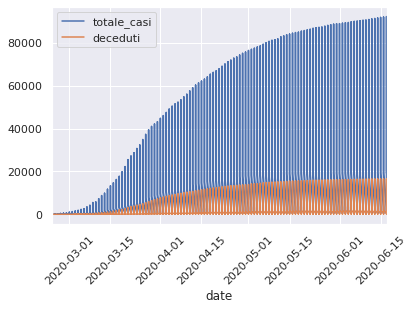

In [23]:
region.plot(y=['totale_casi', 'deceduti'], x='date', rot=45);  

From the plot we see that the number of people infected by the Covid-19 has increased very rapidly in the first month (from the 1st of March to the first of April) and that it has continued increasing quite rapidely. The number of deaths has increased in the fist two months but now it seems quite constant.

### Time series of the counts provided
Distinction by regions

In [24]:
regions_names = region['denominazione_regione'].unique() 

# define the figure size and grid layout properties
figsize = (20, 40)
cols = 2
rows = len(regions_names) // cols + 1

def trim_axs(axs, N):
    """ Reduce *axs* to *N* Axes. 
    All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

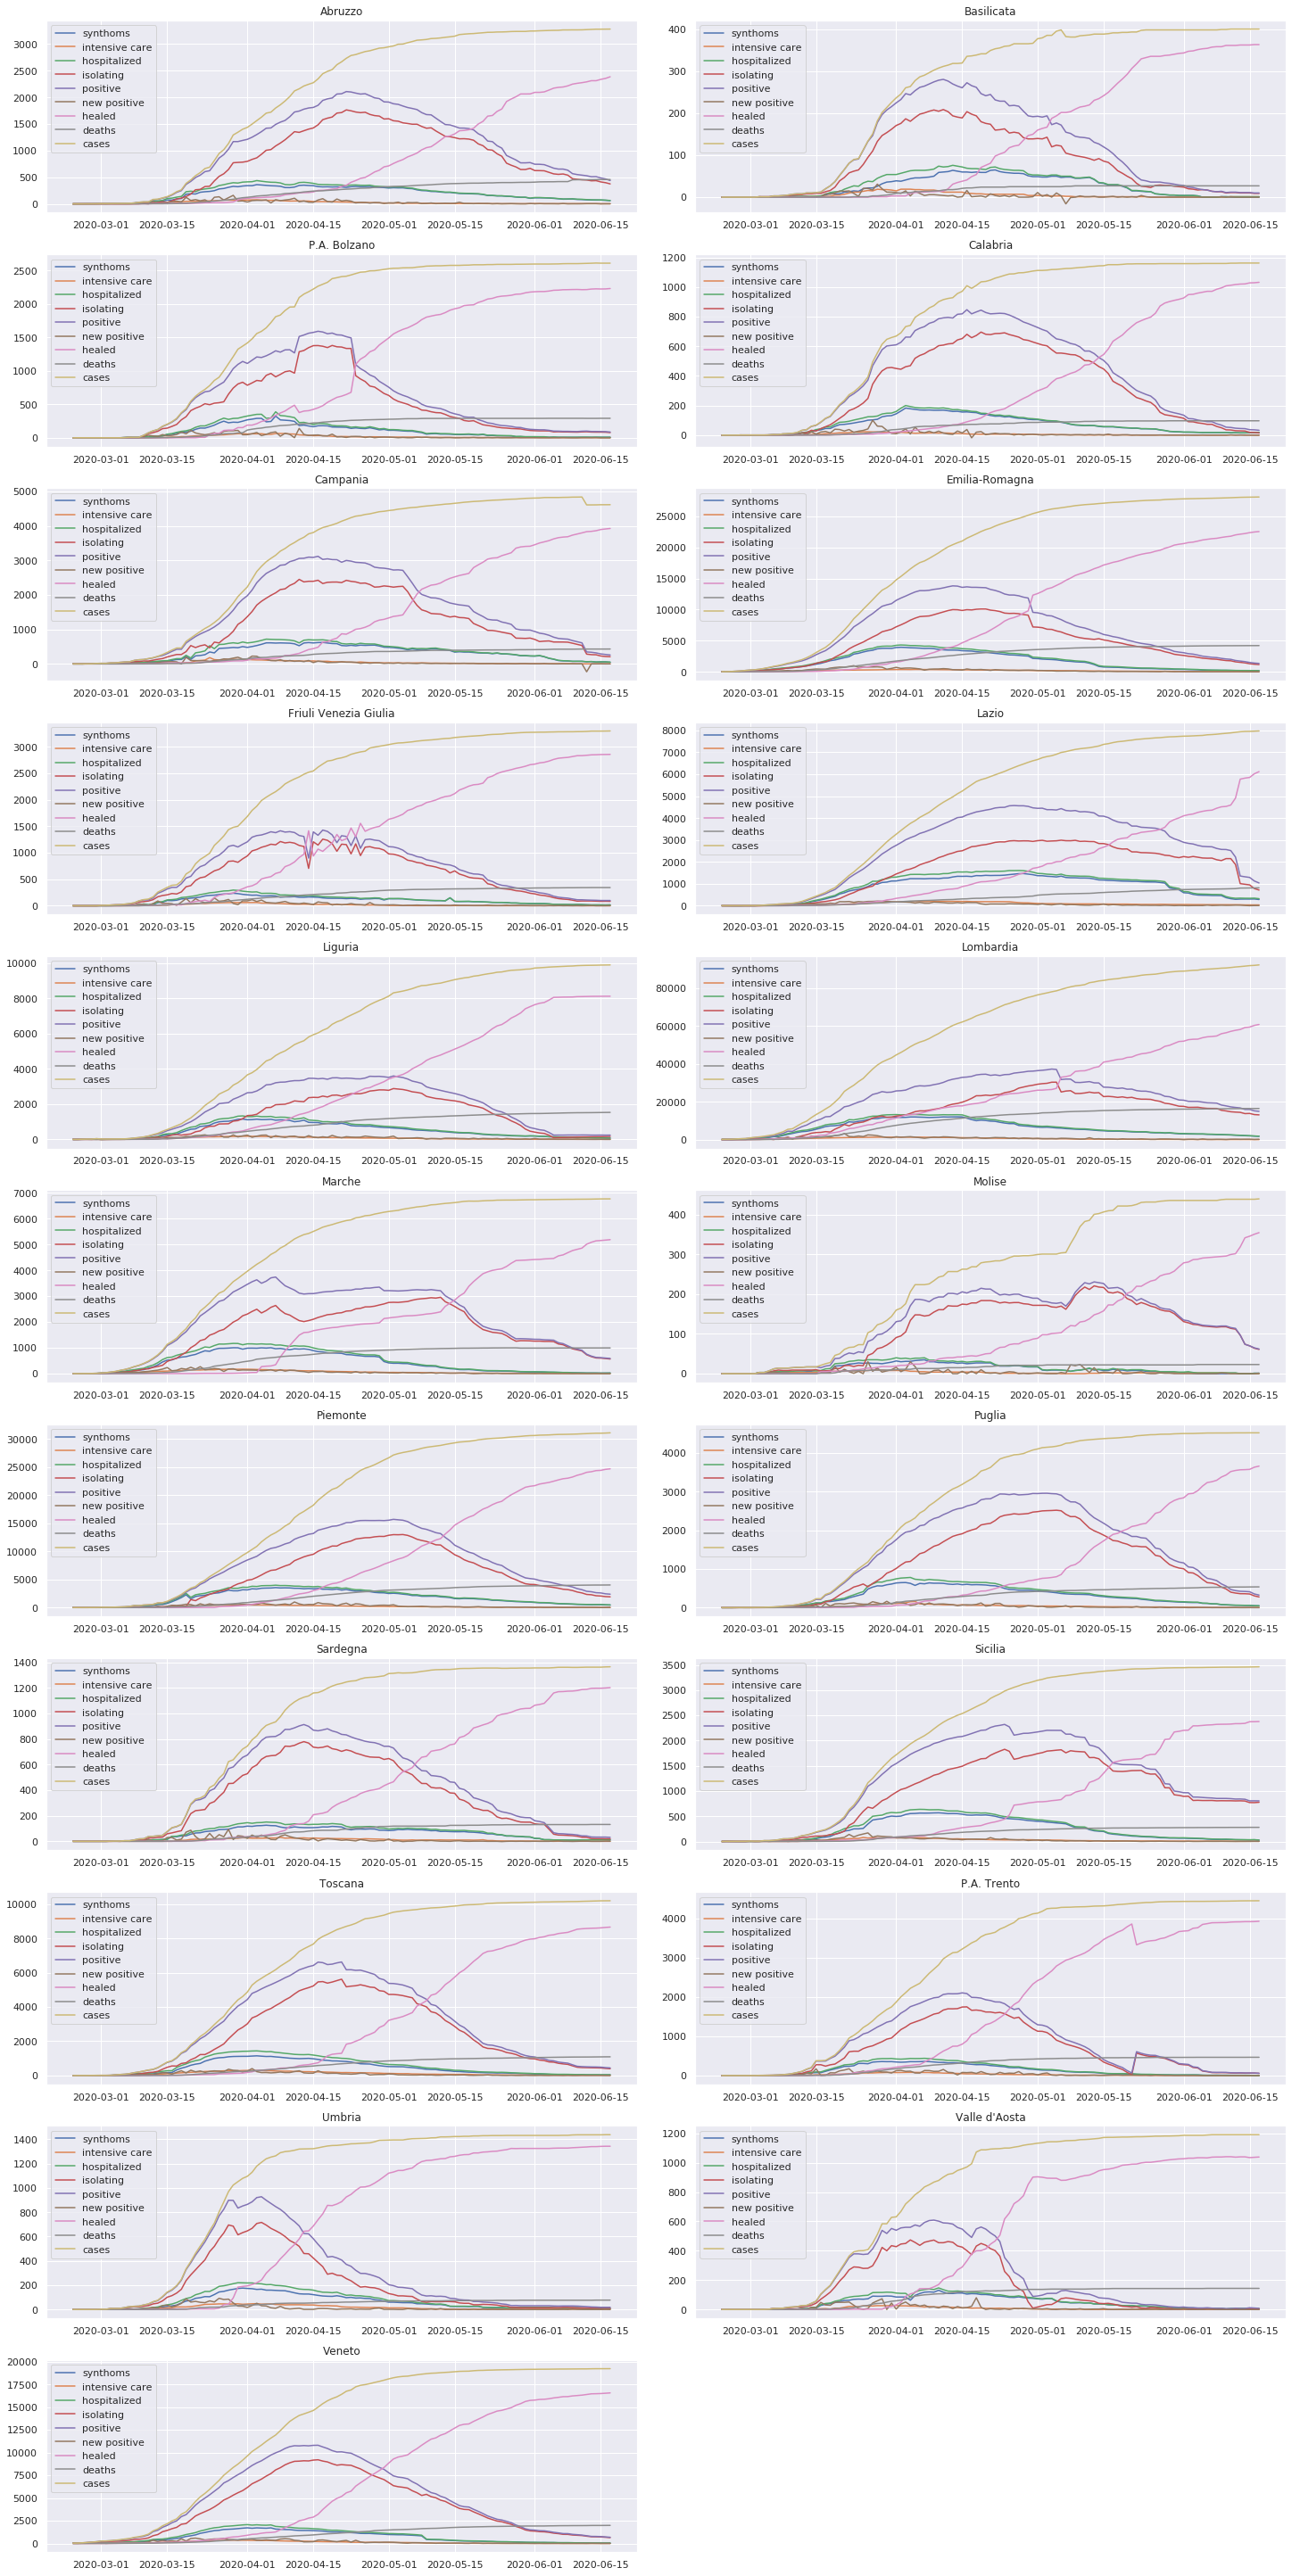

In [25]:
fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs = trim_axs(axs, len(regions_names))
for ax, reg in zip(axs, regions_names):
    ax.set_title(str(reg))
    df_r = region[region['denominazione_regione']==reg]
    ax.plot(df_r['date'], df_r['ricoverati_con_sintomi'], label='synthoms')
    ax.plot(df_r['date'], df_r['terapia_intensiva'], label='intensive care')     
    ax.plot(df_r['date'], df_r['totale_ospedalizzati'], label='hospitalized')   
    ax.plot(df_r['date'], df_r['isolamento_domiciliare'], label='isolating')
    ax.plot(df_r['date'], df_r['totale_positivi'], label='positive')
    ax.plot(df_r['date'], df_r['nuovi_positivi'], label='new positive')
    ax.plot(df_r['date'], df_r['dimessi_guariti'], label='healed')
    ax.plot(df_r['date'], df_r['deceduti'], label='deaths')
    ax.plot(df_r['date'], df_r['totale_casi'], label='cases')    
    ax.legend()

Let's repeat the same plot as before fixing the ylim to analyze differences by regions.

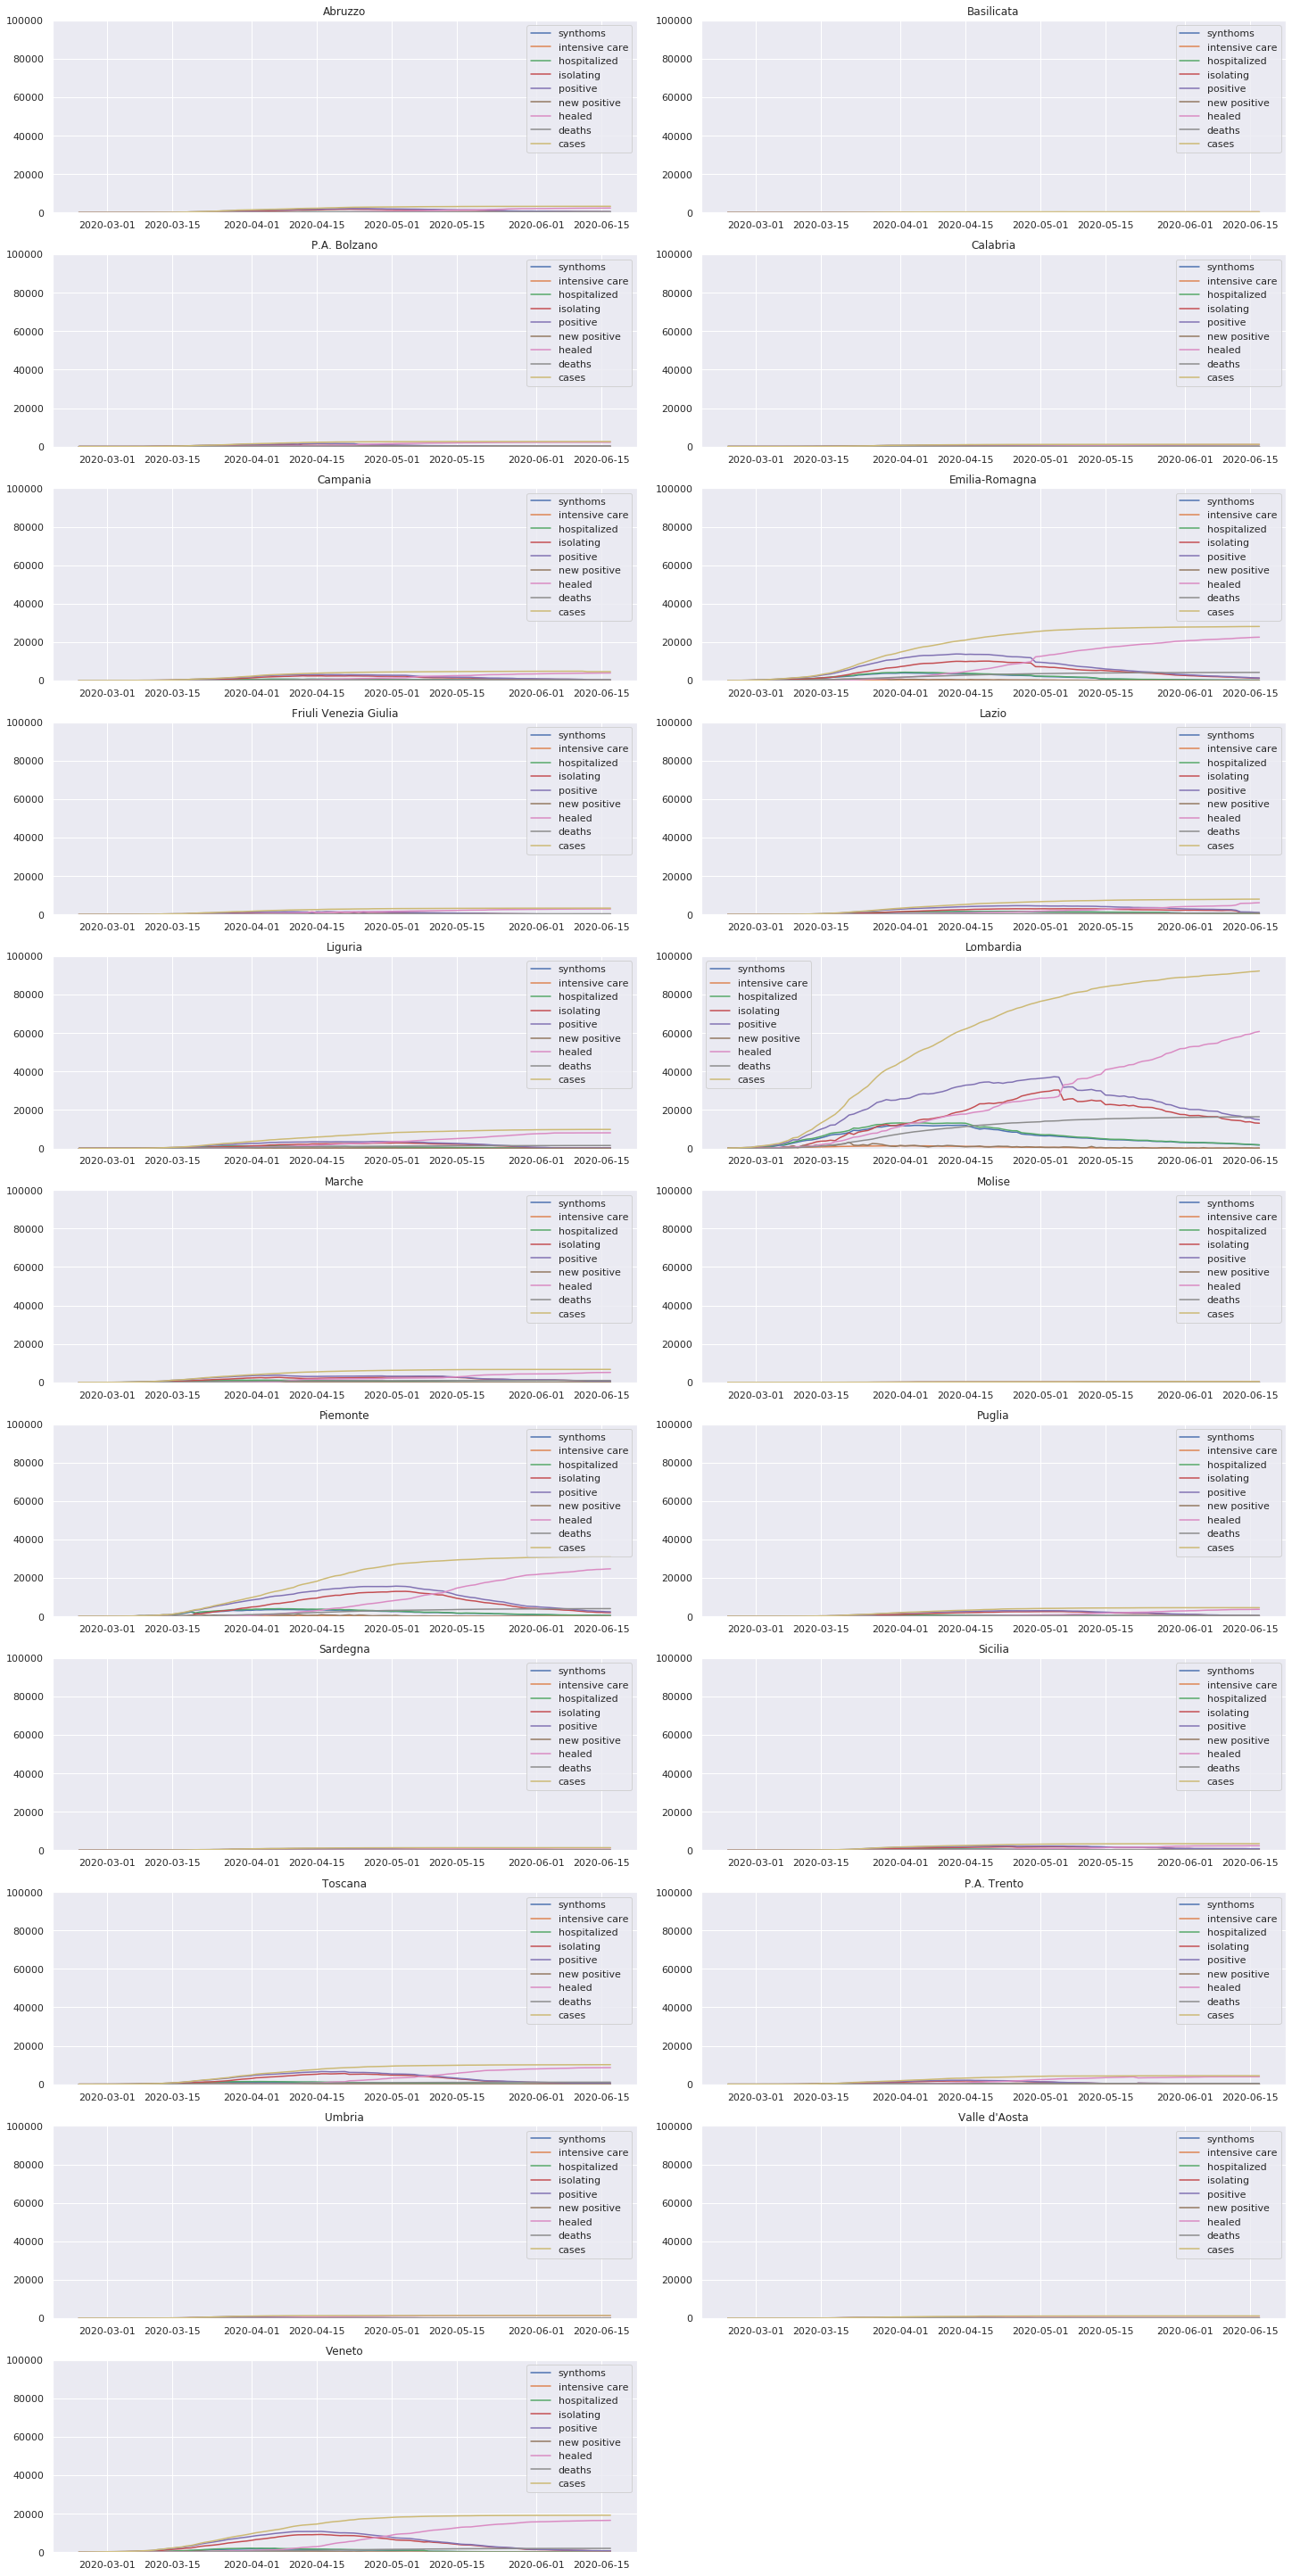

In [26]:
fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs = trim_axs(axs, len(regions_names))
for ax, case in zip(axs, regions_names):
    ax.set_title(str(case))
    df_r = region[region['denominazione_regione']==case]
    ax.set_ylim((0, 100000))
    ax.plot(df_r['date'], df_r['ricoverati_con_sintomi'], label='synthoms')
    ax.plot(df_r['date'], df_r['terapia_intensiva'], label='intensive care')     
    ax.plot(df_r['date'], df_r['totale_ospedalizzati'], label='hospitalized')   
    ax.plot(df_r['date'], df_r['isolamento_domiciliare'], label='isolating')
    ax.plot(df_r['date'], df_r['totale_positivi'], label='positive')
    ax.plot(df_r['date'], df_r['nuovi_positivi'], label='new positive')
    ax.plot(df_r['date'], df_r['dimessi_guariti'], label='healed')
    ax.plot(df_r['date'], df_r['deceduti'], label='deaths')
    ax.plot(df_r['date'], df_r['totale_casi'], label='cases')    
    ax.legend()

As we can see most of the lines of the plot can be barely seen. This is because Lombardy has very higher values for quite all the counts evaluated. 
Form the plots we can say that the regions in which we find high values (apart from Lombardy) are Veneto, Piedmont and Emilia-Romagna.

### Add population density

We add population data from Istat (January, 1, 2019) https://www.tuttitalia.it/province/popolazione/.

In [33]:
# read the dataset
pop = pd.read_csv('population.csv')
pop.head()

,Provincia,Reg,Popolazione
0,RM\nCittà Metropolitana di\nROMA CAPITALE,LAZ,4.342.212
1,MI\nCittà Metropolitana di\nMILANO,LOM,3.250.315
2,NA\nCittà Metropolitana di\nNAPOLI,CAM,3.084.890
3,TO\nCittà Metropolitana di\nTORINO,PIE,2.259.523
4,BS\nBrescia,LOM,1.265.954


In [34]:
# frist look to the variables
pop.describe(include='all')

,Provincia,Reg,Popolazione
count,107,107,107
unique,107,21,107
top,LO\nLodi,LOM,622.183
freq,1,12,1


The values of the population density (variable 'Popolazione') is seen as a string so it has to be converted

In [35]:
popolazione = []
for p in pop['Popolazione']:
    popolazione.append(int(p.replace('.', ''))) # we remove the dots
pop['Popolazione'] = popolazione                # we replace the values

In [36]:
pop.head()

,Provincia,Reg,Popolazione
0,RM\nCittà Metropolitana di\nROMA CAPITALE,LAZ,4342212
1,MI\nCittà Metropolitana di\nMILANO,LOM,3250315
2,NA\nCittà Metropolitana di\nNAPOLI,CAM,3084890
3,TO\nCittà Metropolitana di\nTORINO,PIE,2259523
4,BS\nBrescia,LOM,1265954


#### Add density information to the dataset 'province'

In [37]:
# the variable 'Provincia' has a different notation so it is necessary change it so that we can use it 
prov = []
for i in pop.index:
    prov.append(pop.Provincia[i][:2])

In [38]:
# we create a dataframe with the initial of the province and its population density
df_pop_prov = pd.DataFrame({'Popolazione': pop.Popolazione, 'sigla_provincia': prov}, columns=['sigla_provincia', 'Popolazione'])
df_pop_prov

,sigla_provincia,Popolazione
0,RM,4342212
1,MI,3250315
2,NA,3084890
3,TO,2259523
4,BS,1265954
...,...,...
102,OR,157707
103,RI,155503
104,GO,139403
105,AO,125666


In [40]:
province_pop = pd.merge(province, df_pop_prov, on='sigla_provincia')
province_pop

,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en,date,Popolazione
0,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,,,2020-02-24,385588
1,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,,,2020-02-25,385588
2,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,,,2020-02-26,385588
3,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,,,2020-02-27,385588
4,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,,,2020-02-28,385588
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,ITA,5,Veneto,24,Vicenza,VI,45.547497,11.545971,2855,,,2020-06-13,862418
12301,ITA,5,Veneto,24,Vicenza,VI,45.547497,11.545971,2855,,,2020-06-14,862418
12302,ITA,5,Veneto,24,Vicenza,VI,45.547497,11.545971,2855,,,2020-06-15,862418
12303,ITA,5,Veneto,24,Vicenza,VI,45.547497,11.545971,2855,,,2020-06-16,862418


#### Add density information to the dataset 'region'

In [41]:
# we create a dataset with the initial of regions and its population density
df_pop_reg =  pd.DataFrame(pop.groupby('Reg')['Popolazione'].sum().reset_index())
df_pop_reg

,Reg,Popolazione
0,ABR,1311580
1,BAS,234405
2,BOL,531178
3,CAL,1789649
4,CAM,5801692
5,EMR,4459477
6,FVG,1215220
7,LAZ,5593755
8,LIG,601122
9,LOM,9756932


It is necessary to link the abbrevation of regions to the full name. This step is useful to add the population information to the two origina datasets.

In [42]:
df_pop_reg.Reg.unique() 

array(['ABR', 'BAS', 'BOL', 'CAL', 'CAM', 'EMR', 'FVG', 'LAZ', 'LIG',
       'LOM', 'MAR', 'MOL', 'PIE', 'PUG', 'SAR', 'SIC', 'TAA', 'TOS',
       'UMB', 'VDA', 'VEN'], dtype=object)

In [43]:
region['denominazione_regione'].unique()

array(['Abruzzo', 'Basilicata', 'P.A. Bolzano', 'Calabria', 'Campania',
       'Emilia-Romagna', 'Friuli Venezia Giulia', 'Lazio', 'Liguria',
       'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sardegna',
       'Sicilia', 'Toscana', 'P.A. Trento', 'Umbria', "Valle d'Aosta",
       'Veneto'], dtype=object)

In [44]:
# we create a dictionary to link the abbrevation to the full name
reg_abbrv = {'ABR': 'Abruzzo','BAS': 'Basilicata','BOL': 'P.A. Bolzano','CAL': 'Calabria','CAM': 'Campania',
       'EMR': 'Emilia-Romagna','FVG': 'Friuli Venezia Giulia','LAZ': 'Lazio','LIG': 'Liguria',
       'LOM': 'Lombardia' ,'MAR': 'Marche','MOL': 'Molise','PIE': 'Piemonte','PUG': 'Puglia','SAR': 'Sardegna',
       'SIC':'Sicilia','TOS': 'Toscana','TAA': 'P.A. Trento','UMB': 'Umbria','VDA': "Valle d'Aosta",
       'VEN': 'Veneto'}    

In [45]:
# we add the variable 'denominazione_regione to the dataset of the population density'
regione = []
for i in df_pop_reg.Reg:
    regione.append(reg_abbrv[i])
df_pop_reg['denominazione_regione'] = regione
df_pop_reg = df_pop_reg.drop('Reg', axis=1)

In [46]:
region_pop = pd.merge(region, df_pop_reg, on='denominazione_regione')
region_pop

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,...,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en,date,Popolazione
0,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,...,0,0,0,0,5,NaN,,,2020-02-24,1311580
1,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,...,0,0,0,0,5,NaN,,,2020-02-25,1311580
2,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,...,0,0,0,0,13,NaN,,,2020-02-26,1311580
3,ITA,13,Abruzzo,42.351222,13.398438,1,0,1,0,1,...,1,0,0,1,33,NaN,,,2020-02-27,1311580
4,ITA,13,Abruzzo,42.351222,13.398438,1,0,1,0,1,...,0,0,0,1,33,NaN,,,2020-02-28,1311580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410,ITA,5,Veneto,45.434905,12.338452,41,1,42,736,778,...,13,16457,1977,19212,798290,368659.0,,,2020-06-13,4723199
2411,ITA,5,Veneto,45.434905,12.338452,40,1,41,731,772,...,7,16469,1978,19219,812540,371726.0,,,2020-06-14,4723199
2412,ITA,5,Veneto,45.434905,12.338452,38,1,39,716,755,...,1,16487,1978,19220,817064,373057.0,,,2020-06-15,4723199
2413,ITA,5,Veneto,45.434905,12.338452,36,1,37,681,718,...,1,16521,1982,19221,826192,376001.0,,,2020-06-16,4723199


### Create a dataset containing the counts by regions

In [47]:
df_reg_counts = pd.DataFrame(region_pop.groupby('denominazione_regione')['ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'totale_casi', 'tamponi', 'casi_testati', 'Popolazione'].mean())
df_reg_counts

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,Popolazione
denominazione_regione,,,,,,,,,,,,,
Abruzzo,188.121739,23.052174,211.173913,813.617391,1024.791304,3.808696,28.539130,780.669565,232.295652,2037.756522,34612.678261,41732.783333,1311580.0
Basilicata,24.930435,4.930435,29.860870,79.886957,109.747826,0.086957,3.486957,137.930435,16.408696,264.086957,12403.652174,21880.000000,234405.0
Calabria,70.086957,5.886957,75.973913,303.982609,379.956522,0.286957,10.104348,338.886957,58.991304,777.834783,32183.539130,53469.750000,1789649.0
Campania,306.330435,38.739130,345.069565,1107.330435,1452.400000,2.243478,40.121739,1390.347826,248.139130,3090.886957,82813.965217,73873.650000,5801692.0
Emilia-Romagna,1641.391304,168.000000,1809.391304,4671.808696,6481.200000,11.539130,244.443478,9259.852174,2534.165217,18275.217391,159251.478261,167775.350000,4459477.0
Friuli Venezia Giulia,95.408696,15.260870,110.669565,556.234783,666.904348,0.860870,28.686957,1283.478261,199.573913,2149.956522,61181.530435,64578.966667,1215220.0
Lazio,827.956522,89.452174,917.408696,1721.843478,2639.252174,9.017391,69.356522,1726.295652,372.339130,4737.886957,120437.600000,160619.016667,5593755.0
Liguria,485.539130,63.356522,548.895652,1237.460870,1786.356522,2.121739,86.052174,3122.800000,833.460870,5742.617391,46898.600000,47598.883333,601122.0
Lombardia,6056.843478,581.904348,6638.747826,15330.956522,21969.704348,128.747826,802.573913,24864.513043,10087.321739,56921.539130,351758.017391,353828.216667,9756932.0


We use the population density to obtain the percentage of each count in the population of each region.

In [49]:
df_divided_by_pop = df_reg_counts.div(df_reg_counts['Popolazione'], axis=0)
df_divided_by_pop = df_divided_by_pop.drop('Popolazione', axis=1)
df_divided_by_pop

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati
denominazione_regione,,,,,,,,,,,,
Abruzzo,0.000143,0.000018,0.000161,0.000620,0.000781,2.903899e-06,0.000022,0.000595,0.000177,0.001554,0.026390,0.031819
Basilicata,0.000106,0.000021,0.000127,0.000341,0.000468,3.709670e-07,0.000015,0.000588,0.000070,0.001127,0.052915,0.093343
Calabria,0.000039,0.000003,0.000042,0.000170,0.000212,1.603423e-07,0.000006,0.000189,0.000033,0.000435,0.017983,0.029877
Campania,0.000053,0.000007,0.000059,0.000191,0.000250,3.866938e-07,0.000007,0.000240,0.000043,0.000533,0.014274,0.012733
Emilia-Romagna,0.000368,0.000038,0.000406,0.001048,0.001453,2.587552e-06,0.000055,0.002076,0.000568,0.004098,0.035711,0.037622
Friuli Venezia Giulia,0.000079,0.000013,0.000091,0.000458,0.000549,7.084064e-07,0.000024,0.001056,0.000164,0.001769,0.050346,0.053142
Lazio,0.000148,0.000016,0.000164,0.000308,0.000472,1.612046e-06,0.000012,0.000309,0.000067,0.000847,0.021531,0.028714
Liguria,0.000808,0.000105,0.000913,0.002059,0.002972,3.529631e-06,0.000143,0.005195,0.001387,0.009553,0.078018,0.079183
Lombardia,0.000621,0.000060,0.000680,0.001571,0.002252,1.319552e-05,0.000082,0.002548,0.001034,0.005834,0.036052,0.036264


### Histogram of the counts by region

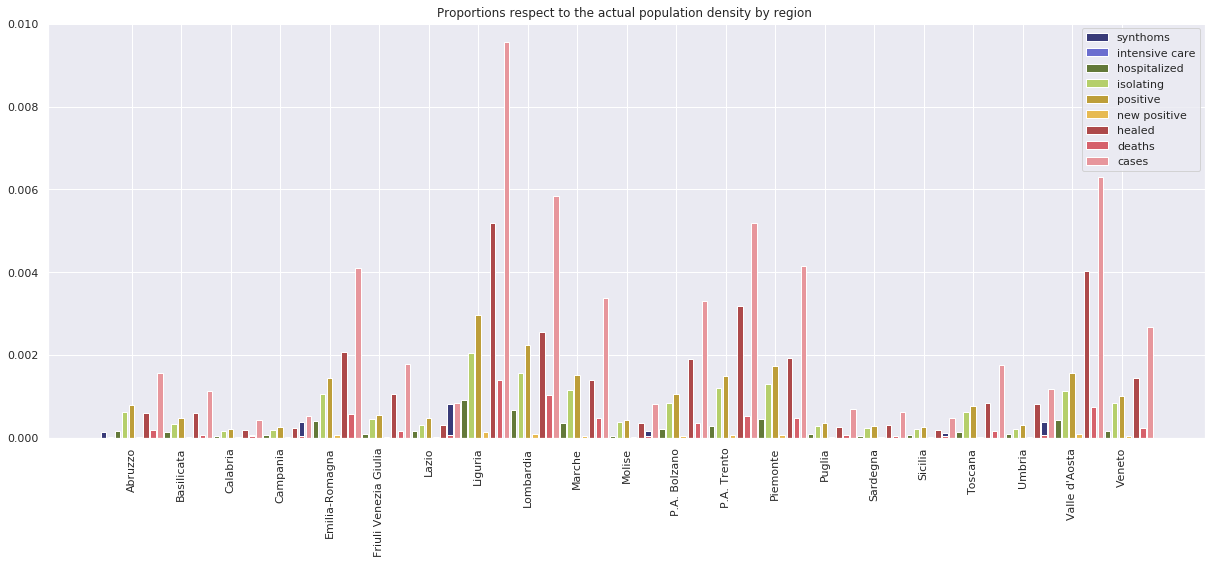

In [50]:
labels = df_divided_by_pop.index

x = np.arange(0, 21*7, step = 7)  # the label locations

fig, ax = plt.subplots(figsize=(17,8))

ax.bar(x-4, df_divided_by_pop['ricoverati_con_sintomi'], width=7./9., label='synthoms', color = sns.color_palette("tab20b")[0])
ax.bar(x-3, df_divided_by_pop['terapia_intensiva'], width=7./9., label='intensive care', color = sns.color_palette("tab20b")[2])     
ax.bar(x-2, df_divided_by_pop['totale_ospedalizzati'], width=7./9., label='hospitalized', color = sns.color_palette("tab20b")[4])   
ax.bar(x-1, df_divided_by_pop['isolamento_domiciliare'], width=7./9., label='isolating', color = sns.color_palette("tab20b")[6])
ax.bar(x, df_divided_by_pop['totale_positivi'], width=7./9., label='positive', color = sns.color_palette("tab20b")[9])
ax.bar(x+1, df_divided_by_pop['nuovi_positivi'], width=7./9., label='new positive', color = sns.color_palette("tab20b")[10])
ax.bar(x+2, df_divided_by_pop['dimessi_guariti'], width=7./9., label='healed', color = sns.color_palette("tab20b")[13])
ax.bar(x+3, df_divided_by_pop['deceduti'], width=7./9., label='deaths', color = sns.color_palette("tab20b")[14])
ax.bar(x+4, df_divided_by_pop['totale_casi'], width=7./9., label='cases', color = sns.color_palette("tab20b")[15])  

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Proportions respect to the actual population density by region ')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

fig.tight_layout()
plt.show(); # click twice to zoom

### Boxplots of each count

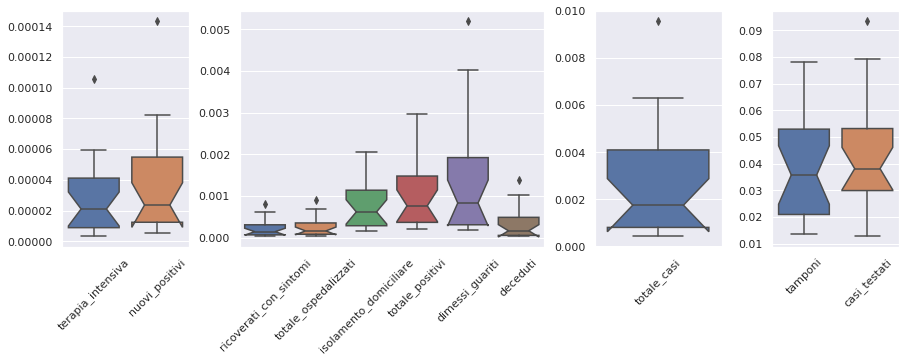

In [51]:
fig = plt.figure(figsize=(15, 10))
grid = plt.GridSpec(2, 5, wspace=0.4, hspace=0.3)

# boxplots for low values
low_val = plt.subplot(grid[0, 0])
sns.boxplot(data=df_divided_by_pop[['terapia_intensiva', 'nuovi_positivi']], ax=low_val, notch=True)
low_val.set_xticklabels(low_val.get_xticklabels(),rotation=45);

# boxplots for medium-low
medium_low_val = plt.subplot(grid[0, 1:3])
sns.boxplot(data=df_divided_by_pop[['ricoverati_con_sintomi', 'totale_ospedalizzati', 'isolamento_domiciliare',
                                   'totale_positivi', 'dimessi_guariti', 'deceduti']], ax=medium_low_val, notch=True)
medium_low_val.set_xticklabels(medium_low_val.get_xticklabels(),rotation=45);

# boxplots for medium-high
medium_high_val = plt.subplot(grid[0, 3])
sns.boxplot(data=df_divided_by_pop[['totale_casi']], ax=medium_high_val, notch=True)
medium_high_val.set_xticklabels(medium_high_val.get_xticklabels(),rotation=45);

# boxplots for high
high_val = plt.subplot(grid[0, 4])
sns.boxplot(data=df_divided_by_pop[['tamponi', 'casi_testati']], ax=high_val, notch=True)
high_val.set_xticklabels(high_val.get_xticklabels(),rotation=45);


The boxplots has been splitted into three plots to make them readable (they have different ranges and if put together some boxes resulted flat).

### Pie-plot of the contribution of every region in the main tallies

In [52]:
# new df including only some tally
some_counts = pd.DataFrame(region.groupby('denominazione_regione')['ricoverati_con_sintomi', 'terapia_intensiva',
       'isolamento_domiciliare', 'totale_positivi',
       'dimessi_guariti','deceduti', 'totale_casi', 'tamponi'].mean())


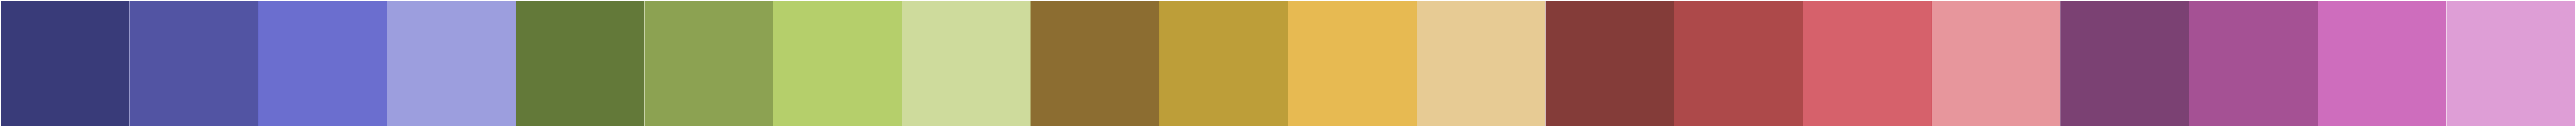

In [53]:
sns.palplot(sns.color_palette("tab20b"), 21)

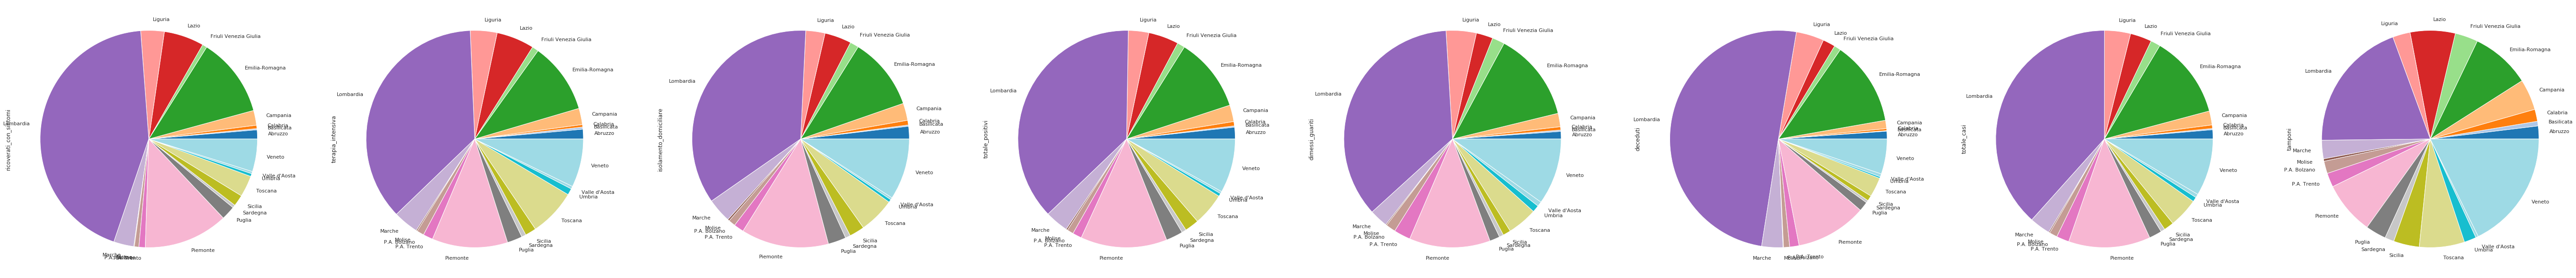

In [54]:
some_counts.plot.pie(subplots=True, figsize=(100,100), legend=False, colormap = "tab20");
#click twice on the image to zoom

In every pie plot comes out that Lombardy is the italian region that the most has benn dameged by Covid-19.
The majority of hospitalized, deaths and positive cases have been registred in Lombardy with a huge difference from the other regions. 

Instead, the number of swaps in Lombardy is not as highly different as before. Veneto seem to have the same number of swaps as the Lombardy.

## Merging the two data sets
In order to make the analysis more interesting, we can merge the two datasets (regions and province) to build one hierarchical DataFrame.


In [56]:
cols_prov = ['codice_provincia', 'date', 'denominazione_provincia', 
             'denominazione_regione', 'lat', 'long', 'sigla_provincia', 'Popolazione']   # isolating variables from province
merged = pd.merge(province_pop[cols_prov], region, on = ['denominazione_regione', 'date'], 
                  suffixes = ["_prov", "_reg"])                           # merging the datasets
merged.set_index(['denominazione_regione', 'sigla_provincia', 'date'], inplace=True) 
merged

codice_provincia  \
denominazione_regione sigla_provincia date                           
Abruzzo               CH              2020-02-24                69   
                      AQ              2020-02-24                66   
                      PE              2020-02-24                68   
                      TE              2020-02-24                67   
                      CH              2020-02-25                69   
...                                                            ...   
Veneto                RO              2020-06-17                29   
                      TV              2020-06-17                26   
                      VE              2020-06-17                27   
                      VR              2020-06-17                23   
                      VI              2020-06-17                24   

                                                 denominazione_provincia  \
denominazione_regione sigla_provincia date                                 
Abruzzo               CH              2020-02-24                  Chieti   
                      AQ              2020-02-24                L'Aquila   
                      PE              2020-02-24                 Pescara   
                      TE              2020-02-24                  Teramo   
                      CH              2020-02-25                  Chieti   
...                                                                  ...   
Veneto                RO              2020-06-17                  Rovigo   
                      TV              2020-06-17                 Treviso   
                      VE              2020-06-17                 Venezia   
                      VR              2020-06-17                  Verona   
                      VI              2020-06-17                 Vicenza   

                                                   lat_prov  long_prov  \
denominazione_regione sigla_provincia date                               
Abruzzo               CH              2020-02-24  42.351032  14.167546   
                      AQ              2020-02-24  42.351222  13.398438   
                      PE              2020-02-24  42.464584  14.213648   
                      TE              2020-02-24  42.658918  13.704400   
                      CH              2020-02-25  42.351032  14.167546   
...                                                     ...        ...   
Veneto                RO              2020-06-17  45.071073  11.790070   
                      TV              2020-06-17  45.667546  12.245074   
                      VE              2020-06-17  45.434905  12.338452   
                      VR              2020-06-17  45.438390  10.993527   
                      VI              2020-06-17  45.547497  11.545971   

                                                  Popolazione stato  \
denominazione_regione sigla_provincia date                            
Abruzzo               CH              2020-02-24       385588   ITA   
                      AQ              2020-02-24       299031   ITA   
                      PE              2020-02-24       318909   ITA   
                      TE              2020-02-24       308052   ITA   
                      CH              2020-02-25       385588   ITA   
...                                                       ...   ...   
Veneto                RO              2020-06-17       234937   ITA   
                      TV              2020-06-17       887806   ITA   
                      VE              2020-06-17       853338   ITA   
                      VR              2020-06-17       926497   ITA   
                      VI              2020-06-17       862418   ITA   

                                                  codice_regione    lat_reg  \
denominazione_regione sigla_provincia date                                    
Abruzzo               CH              2020-02-24              13  42.351222   
                      AQ  

In [57]:
merged.sort_index(inplace=True)       # set multinIndex sorted by date
merged

codice_provincia  \
denominazione_regione sigla_provincia date                           
Abruzzo               AQ              2020-02-24                66   
                                      2020-02-25                66   
                                      2020-02-26                66   
                                      2020-02-27                66   
                                      2020-02-28                66   
...                                                            ...   
Veneto                VR              2020-06-13                23   
                                      2020-06-14                23   
                                      2020-06-15                23   
                                      2020-06-16                23   
                                      2020-06-17                23   

                                                 denominazione_provincia  \
denominazione_regione sigla_provincia date                                 
Abruzzo               AQ              2020-02-24                L'Aquila   
                                      2020-02-25                L'Aquila   
                                      2020-02-26                L'Aquila   
                                      2020-02-27                L'Aquila   
                                      2020-02-28                L'Aquila   
...                                                                  ...   
Veneto                VR              2020-06-13                  Verona   
                                      2020-06-14                  Verona   
                                      2020-06-15                  Verona   
                                      2020-06-16                  Verona   
                                      2020-06-17                  Verona   

                                                   lat_prov  long_prov  \
denominazione_regione sigla_provincia date                               
Abruzzo               AQ              2020-02-24  42.351222  13.398438   
                                      2020-02-25  42.351222  13.398438   
                                      2020-02-26  42.351222  13.398438   
                                      2020-02-27  42.351222  13.398438   
                                      2020-02-28  42.351222  13.398438   
...                                                     ...        ...   
Veneto                VR              2020-06-13  45.438390  10.993527   
                                      2020-06-14  45.438390  10.993527   
                                      2020-06-15  45.438390  10.993527   
                                      2020-06-16  45.438390  10.993527   
                                      2020-06-17  45.438390  10.993527   

                                                  Popolazione stato  \
denominazione_regione sigla_provincia date                            
Abruzzo               AQ              2020-02-24       299031   ITA   
                                      2020-02-25       299031   ITA   
                                      2020-02-26       299031   ITA   
                                      2020-02-27       299031   ITA   
                                      2020-02-28       299031   ITA   
...                                                       ...   ...   
Veneto                VR              2020-06-13       926497   ITA   
                                      2020-06-14       926497   ITA   
                                      2020-06-15       926497   ITA   
                                      2020-06-16       926497   ITA   
                                      2020-06-17       926497   ITA   

                                                  codice_regione    lat_reg  \
denominazione_regione sigla_provincia date                                    
Abruzzo               AQ              2020-02-24              13  42.351222   
                          

In [58]:
merged.index    # new indexes

MultiIndex([('Abruzzo', 'AQ', '2020-02-24'),
            ('Abruzzo', 'AQ', '2020-02-25'),
            ('Abruzzo', 'AQ', '2020-02-26'),
            ('Abruzzo', 'AQ', '2020-02-27'),
            ('Abruzzo', 'AQ', '2020-02-28'),
            ('Abruzzo', 'AQ', '2020-02-29'),
            ('Abruzzo', 'AQ', '2020-03-01'),
            ('Abruzzo', 'AQ', '2020-03-02'),
            ('Abruzzo', 'AQ', '2020-03-03'),
            ('Abruzzo', 'AQ', '2020-03-04'),
            ...
            ( 'Veneto', 'VR', '2020-06-08'),
            ( 'Veneto', 'VR', '2020-06-09'),
            ( 'Veneto', 'VR', '2020-06-10'),
            ( 'Veneto', 'VR', '2020-06-11'),
            ( 'Veneto', 'VR', '2020-06-12'),
            ( 'Veneto', 'VR', '2020-06-13'),
            ( 'Veneto', 'VR', '2020-06-14'),
            ( 'Veneto', 'VR', '2020-06-15'),
            ( 'Veneto', 'VR', '2020-06-16'),
            ( 'Veneto', 'VR', '2020-06-17')],
           names=['denominazione_regione', 'sigla_provincia', 'date'], length=12305

In [59]:
merged.shape    # new shape

(12305, 23)

In [60]:
merged.columns  # new variables

Index(['codice_provincia', 'denominazione_provincia', 'lat_prov', 'long_prov',
       'Popolazione', 'stato', 'codice_regione', 'lat_reg', 'long_reg',
       'ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati',
       'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'totale_casi', 'tamponi', 'casi_testati', 'note_it',
       'note_en'],
      dtype='object')

The new merged dataset is composed by 23 variables.

### Italian scatterplot of cases
Let's use the latitude and longitude

In [61]:
# be sure that longitude and latitude do not change 
df_1 = merged.groupby('denominazione_provincia')['lat_prov', 'long_prov']
df_1.head()

lat_prov  long_prov
denominazione_regione sigla_provincia date                            
Abruzzo               AQ              2020-02-24  42.351222  13.398438
                                      2020-02-25  42.351222  13.398438
                                      2020-02-26  42.351222  13.398438
                                      2020-02-27  42.351222  13.398438
                                      2020-02-28  42.351222  13.398438
...                                                     ...        ...
Veneto                VR              2020-02-24  45.438390  10.993527
                                      2020-02-25  45.438390  10.993527
                                      2020-02-26  45.438390  10.993527
                                      2020-02-27  45.438390  10.993527
                                      2020-02-28  45.438390  10.993527

[535 rows x 2 columns]

In [193]:
# build an aggregated dataset in which we consider also the latitude and longitude
df_counts_merged = pd.DataFrame(merged.groupby('sigla_provincia')['ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'totale_casi', 'tamponi', 'casi_testati', 'lat_prov', 'long_prov', 'Popolazione'].mean())

# add population density
df_counts_merged['casi_su_popolazione'] = df_counts_merged['totale_casi']/df_counts_merged['Popolazione'] 
df_counts_merged.head()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,lat_prov,long_prov,Popolazione,casi_su_popolazione
sigla_provincia,,,,,,,,,,,,,,,,
AG,234.773913,26.200000,260.973913,977.443478,1238.417391,7.000000,30.104348,804.400000,160.730435,2203.547826,68894.182609,105845.333333,37.309711,13.584575,43487.0,0.050671
AL,1743.565217,179.173913,1922.739130,5637.869565,7560.608696,20.713043,270.704348,8374.495652,2122.808696,18057.913043,141347.200000,165947.466667,44.912974,8.615401,421284.0,0.042864
AN,417.034783,59.826087,476.860870,1569.347826,2046.208696,5.086957,58.817391,1902.452174,636.130435,4584.791304,49493.991304,54420.383333,43.616760,13.518875,471228.0,0.009729
AO,46.191304,6.330435,52.521739,143.147826,195.669565,0.069565,10.356522,505.860870,91.747826,793.278261,6753.895652,9069.550000,45.737503,7.320149,125666.0,0.006313
AP,417.034783,59.826087,476.860870,1569.347826,2046.208696,5.086957,58.817391,1902.452174,636.130435,4584.791304,49493.991304,54420.383333,42.853223,13.576911,207179.0,0.022130


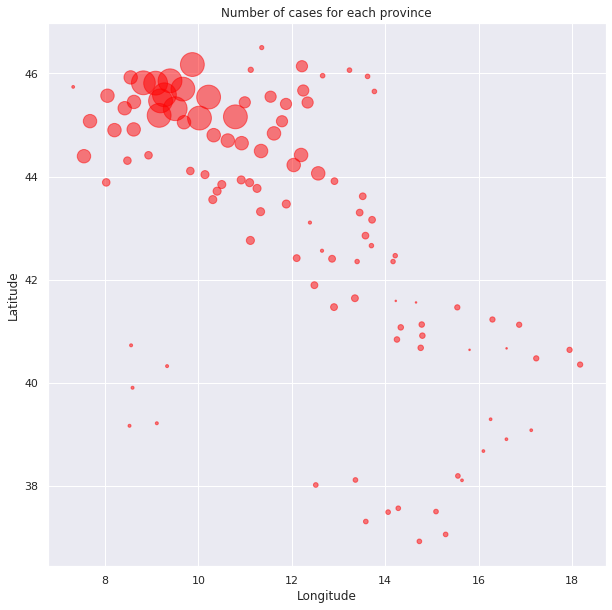

In [203]:
lat = df_counts_merged['lat_prov']          # y position of points
long = df_counts_merged['long_prov']        # x position of points
dim = df_counts_merged['totale_casi']/100   # dimension of points

fig, axs = plt.subplots(figsize=(10, 10))

axs.scatter(long, lat, s=dim, alpha=0.5, color='red')
 # plt.scatter(long, lat, s=area2,  alpha=0.5)
axs.set_xlabel("Longitude")
axs.set_ylabel("Latitude")
axs.set_title('Number of cases for each province');

Let's add Italy border.

In [204]:
zipconfini="http://www.istat.it/storage/cartografia/confini_amministrativi/non_generalizzati/Limiti01012018.zip"
r = requests.get(zipconfini)

In [205]:
# it create a folder in which we can find all the borderd of Italy 
# (We can choose to take only the division by north-centre-south, regions, provinces or municipalities)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [206]:
# we take the borders of provinces
province_border = gpd.read_file("Limiti/Prov/ProvCM01012018_WGS84.shx")
province_border.head()

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_PCM,DEN_PROV,DEN_CM,DEN_PCM,SIGLA,SHAPE_LENG,SHAPE_AREA,SHAPE_LEN,geometry
0,1,1,2,0,2,Vercelli,-,Vercelli,VC,458754.447959,2.081602e+09,458754.447958,"POLYGON ((437900.551 5088796.203, 437915.020 5..."
1,4,15,63,263,263,-,Napoli,Napoli,NA,491263.499868,1.178935e+09,491263.499868,"MULTIPOLYGON (((935240.177 4530273.402, 935241..."
2,2,8,40,0,40,Forli'-Cesena,-,Forli'-Cesena,FC,285062.577704,2.378318e+09,285062.577703,"POLYGON ((744441.959 4910008.475, 744502.959 4..."
3,4,18,79,0,79,Catanzaro,-,Catanzaro,CZ,360558.844634,2.415406e+09,360558.844634,"POLYGON ((1158511.009 4364730.095, 1158541.634..."
4,4,16,75,0,75,Lecce,-,Lecce,LE,360941.246566,2.798875e+09,360941.246566,"MULTIPOLYGON (((1308922.911 4476066.989, 13089..."


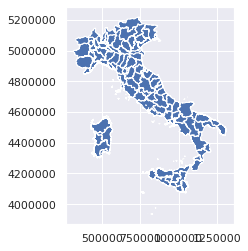

In [213]:
province_border.plot();

X and Y axes are not latitude and longitude.
It is necessary to change x and y reference to make it be compatible with our dataset 

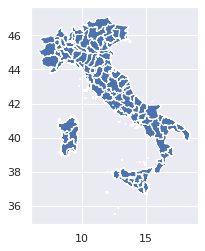

In [214]:
province_border = province_border.to_crs("EPSG:4326")    # change reference
province_border.plot();                   # now x is longitude and y is latitude

In [200]:
# We add the the total cases 
counted = df_counts_merged.reset_index()
cases_by_province = pd.merge(province_border, counted, left_on='SIGLA', right_on='sigla_provincia')

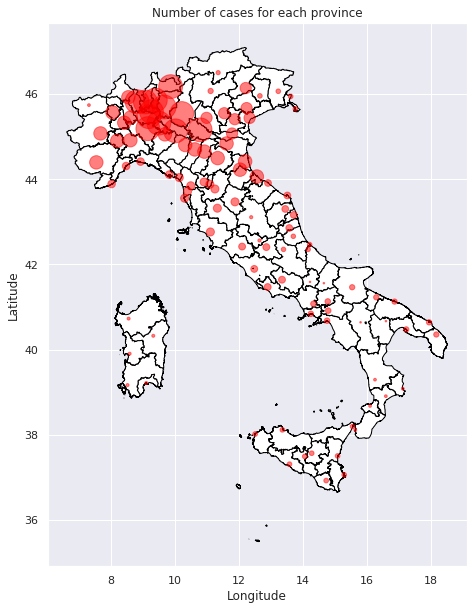

In [212]:
# The same plot as before but with italian map under the dots

lat = df_counts_merged['lat_prov']          # y position of points
long = df_counts_merged['long_prov']        # x position of points
dim = df_counts_merged['totale_casi']/100   # dimension of points

fig, axs = plt.subplots(figsize=(10, 10))

cases_by_province.plot(color='white', edgecolor='black', figsize=(10, 10), ax=axs) # italan mp
axs.scatter(long, lat, s=dim, alpha=0.5, color='red')                              # dots

axs.set_xlabel("Longitude")
axs.set_ylabel("Latitude")
axs.set_title('Number of cases for each province');

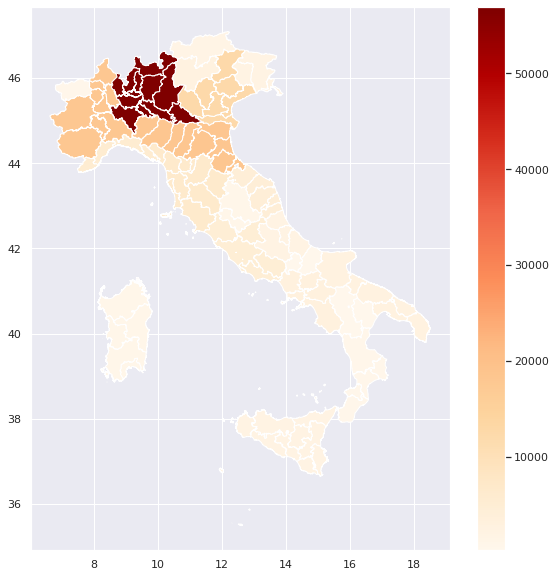

In [208]:
# Plot showing the province color intensity related to the numer of cases
cases_by_province.plot(column='totale_casi', cmap='OrRd', legend=True, figsize=(10,10));